In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
df = pd.read_csv(r'/content/health care diabetes.csv')
print(f"Dataset loaded successfully")
print(f"Dataset Shape: {df.shape}")

Dataset loaded successfully
Dataset Shape: (768, 9)


In [4]:
print("Student Overview:")
df.head()


Student Overview:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
X=df[['Age','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']]
y=df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 7)
(154, 7)
(614,)
(154,)


In [12]:
model=KNeighborsRegressor(n_neighbors=10)
model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [14]:
new_data=[[27, 120, 70, 30, 100, 30.0, 0.3]]
prediction = model.predict(new_data)
print("Predicted Outcome :",prediction[0])

Predicted Outcome : 0.1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


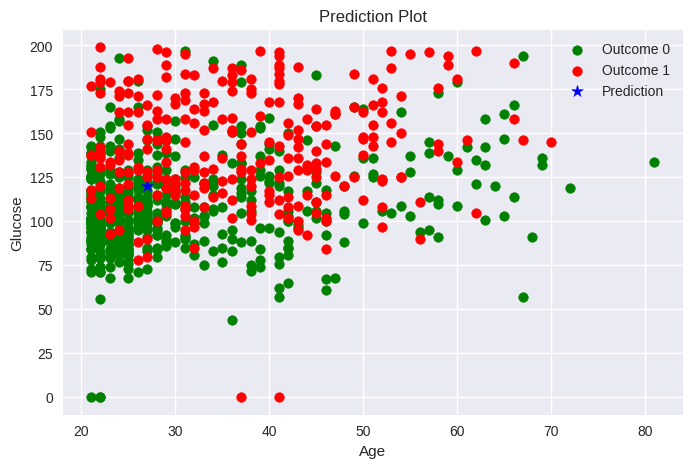

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(X[y==0]['Age'],X[y==0]['Glucose'],color="green",label='Outcome 0')
plt.scatter(X[y==1]['Age'],X[y==1]['Glucose'],color="red",label='Outcome 1')
plt.scatter(new_data[0][0],new_data[0][1],color='blue',marker='*',s=80,label='Prediction')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title("Prediction Plot")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
import joblib
joblib.dump(model, "model.pkl")
joblib.dump(model, "scaler.pkl")
print("model and scaler fixed successfully")

model and scaler fixed successfully
